# 条件波动率的计算

In [1]:
import pandas as pd
close_df = pd.read_csv('datasets/processed_data/close.csv')
close_df.index = close_df['time']
close_df = close_df.iloc[:, 1:]

open_df = pd.read_csv('datasets/processed_data/open.csv')
open_df.index = open_df['time']
open_df = open_df.iloc[:, 1:]

high_df = pd.read_csv('datasets/processed_data/high.csv')
high_df.index = high_df['time']
high_df = high_df.iloc[:, 1:]

low_df = pd.read_csv('datasets/processed_data/low.csv')
low_df.index = low_df['time']
low_df = low_df.iloc[:, 1:]
close_df.shape

(3504, 2212)

### 将数据转换为收益率序列

In [2]:
import pandas as pd
import numpy as np

def calculate_log_returns(df):
    # 计算对数收益率
    return np.log(df / df.shift(1)).dropna()


In [3]:
close_df = close_df.ffill().dropna()
log_returns = calculate_log_returns(close_df)

In [4]:
log_returns

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,601933,601939,601958,601988,601989,601991,601992,601996,601998,601999
time,,,,,,,,,,,,,,,,,,,,,
2012-01-20,0.061435,0.014017,0.006297,0.0,0.017937,0.011094,0.015419,-0.014653,0.000000,0.022506,...,0.090972,0.005296,0.006072,0.008345,0.000000,0.010023,0.020572,0.021506,0.018462,0.016404
2012-01-30,-0.004171,-0.045318,0.001156,0.0,-0.036284,-0.005532,0.002957,-0.022845,0.000000,-0.022506,...,-0.022311,-0.028573,-0.020796,-0.013947,-0.010164,-0.019223,-0.035698,-0.007117,-0.016394,-0.007538
2012-01-31,-0.004204,0.013157,0.015877,0.0,0.013791,-0.023857,0.048040,0.029050,0.000000,0.002964,...,-0.030316,0.005420,0.000618,0.002805,0.017998,0.017408,0.001172,0.008130,-0.002068,0.044397
2012-02-01,-0.011490,-0.011825,-0.020839,0.0,-0.016068,-0.004448,-0.002818,-0.034706,0.000000,-0.026495,...,-0.003769,-0.005420,-0.040333,-0.005618,-0.020271,-0.010041,-0.055369,0.006055,-0.016702,-0.033112
2012-02-02,0.028186,0.015740,0.065771,0.0,0.022853,0.012933,0.048656,0.056904,0.000000,0.034847,...,0.014315,0.023278,0.026025,0.019526,0.029150,0.013668,0.020821,0.034606,0.022894,0.034317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03,-0.011770,-0.019584,-0.043189,0.0,-0.045652,-0.032475,-0.028657,-0.027705,-0.063694,-0.015849,...,0.094518,0.003184,-0.036659,0.000000,0.002336,0.003578,-0.028710,-0.022762,-0.028431,-0.019262
2024-06-04,0.003638,0.032825,-0.026533,0.0,0.019023,0.006138,0.019137,0.015520,-0.048925,0.023270,...,-0.060672,0.000000,0.021928,0.000000,0.002331,0.016529,0.016848,-0.010060,-0.003905,-0.008137
2024-06-05,-0.013706,-0.030361,-0.034690,0.0,-0.041240,-0.020782,-0.024024,-0.008241,-0.019103,-0.017123,...,-0.033846,0.001271,-0.028367,0.001932,0.000000,-0.016529,-0.012005,-0.023530,-0.008644,-0.029853


In [5]:
# log_returns.to_csv('log_returns.csv')

In [6]:
from tqdm import tqdm
for i in tqdm(log_returns.columns):
    for j in log_returns.index:
        if log_returns.loc[j,i]> 0.5:
            print(j, i, log_returns.loc[j,i])

  5%|▌         | 120/2212 [00:01<00:21, 95.35it/s]

2015-12-18 000520 2.125986449965175


  6%|▋         | 140/2212 [00:01<00:22, 93.65it/s]

2013-07-26 000545 0.6193727307386352


 13%|█▎        | 281/2212 [00:02<00:20, 94.02it/s]

2014-08-06 000751 0.9123909219218859


KeyboardInterrupt: 

## 溢出指数计算

### 条件波动率的计算

In [7]:
from arch import arch_model
from joblib import Parallel, delayed
from tqdm import tqdm

def estimate_volatility_single_series(returns):
    model = arch_model(returns, vol='Garch', p=1, q=1)
    res = model.fit(disp='off')
    return res.conditional_volatility

In [8]:
def estimate_volatility(returns, n_jobs=50):
    # 使用并行处理每列数据
    results = Parallel(n_jobs=n_jobs)(delayed(estimate_volatility_single_series)(returns[col]) for col in tqdm(returns.columns))
    
    # 将结果合并为一个 DataFrame
    volatilities = pd.concat(results, axis=1)
    volatilities.columns = returns.columns
    volatilities.index = returns.index
    
    return volatilities

In [9]:
volatilities = estimate_volatility(log_returns*100.)

  5%|▍         | 100/2212 [00:02<00:50, 41.65it/s]

KeyboardInterrupt: 

In [ ]:
volatilities.to_csv('datasets/processed_data/conditional_vol.csv')

In [14]:
volatilities = pd.read_csv('datasets/processed_data/conditional_vol.csv', index_col=0)

In [27]:
volatilities

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,601933,601939,601958,601988,601989,601991,601992,601996,601998,601999
time,,,,,,,,,,,,,,,,,,,,,
2012-01-20,1.884160,2.066665,2.286852,0.731061,2.407929,2.721594,2.209964,2.812903,1.363675,3.331488,...,2.755140,1.089197,2.288879,0.861095,2.136018,1.535771,2.686177,2.376037,1.324802,2.297640
2012-01-30,2.411903,2.031186,2.219985,0.857659,2.361746,2.543625,2.148125,2.714427,1.391026,3.227820,...,3.717847,1.035498,2.153772,0.865869,2.003292,1.517830,2.651255,2.366631,1.456511,2.256588
2012-01-31,2.336884,2.364132,2.151476,0.947898,2.544614,2.355691,2.019882,2.681453,1.411791,3.130959,...,3.557059,1.512826,2.166017,0.955502,1.916189,1.574921,2.729802,2.273397,1.514844,2.151353
2012-02-01,2.264754,2.294564,2.140024,1.015135,2.452450,2.392157,2.598155,2.720486,1.427624,2.961174,...,3.463173,1.405492,2.034719,0.910728,1.915663,1.611220,2.631289,2.190599,1.404144,2.633883
2012-02-02,2.212680,2.226720,2.171805,1.066499,2.386096,2.218796,2.411577,2.809333,1.439735,2.929225,...,3.264411,1.316867,2.437764,0.887648,1.941197,1.581820,2.943972,2.107233,1.480218,2.752529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03,1.422415,3.185528,3.210944,1.262372,2.550719,2.050502,1.645028,1.737235,2.369266,2.567094,...,3.454069,0.782778,3.132422,0.840782,1.584810,1.849487,1.977382,1.724320,1.565734,1.942227
2024-06-04,1.415955,3.075755,3.331345,1.262365,2.847731,2.336759,1.894648,1.899652,3.483765,2.497404,...,4.259779,0.759925,3.189202,0.800970,1.504637,1.776545,2.059381,1.805308,1.872886,1.992445
2024-06-05,1.379636,3.071018,3.278982,1.262359,2.757481,2.177416,1.932357,1.907316,3.766265,2.502157,...,4.370054,0.732648,3.046499,0.764528,1.432382,1.778563,2.043327,1.767298,1.724901,1.927755


In [16]:
import pandas as pd
path='datasets/华证2009-2023年（含细分项+季度)）/华证esg评级2009-2023（细分项）/华证esg评级含细分项（年度）2009-2023.xlsx'
ESG_df = pd.read_excel(path, dtype={'股票代码':str})
ESG_df['股票代码'] = ESG_df['股票代码'].str.zfill(6)
ESG_df.head(1)

,股票代码,年份,综合评级,综合得分,E评级,E得分,S评级,S得分,G评级,G得分,...,重污染分组2,重污染分组3,所属省份代码,所属省份,所属城市代码,所属城市,是否属于西部,是否属于东部,是否属于中部,产权性质
0,000001,2009,BBB,82.38,CCC,69.87,BB,77.46,AA,91.77,...,0.0,0.0,440000.0,广东省,440300.0,深圳市,0.0,1.0,0.0,0.0


In [17]:
ESG = ESG_df[['股票代码', '综合得分']].groupby('股票代码').mean()

<Axes: xlabel='time'>

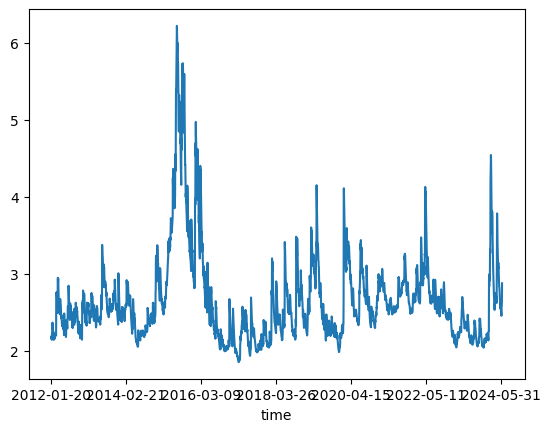

In [26]:
volatilities.mean(axis=1).plot()

In [18]:
df = pd.DataFrame(volatilities.mean(), columns=['Volatility'])
df['ESG_Score'] = ESG
df

,Volatility,ESG_Score
000001,2.030806,83.117333
000002,2.270816,83.623333
000004,3.071209,67.078000
000005,2.373780,65.218667
000006,2.525693,80.014000
...,...,...
601991,1.997373,76.040667
601992,2.239497,78.769231
601996,2.480986,76.471538
601998,1.708615,80.948000


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

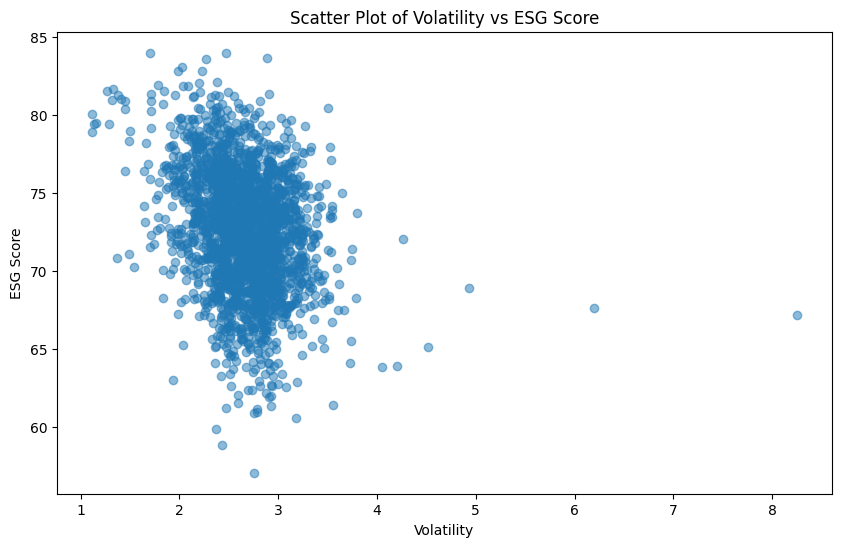

In [20]:
# df.plot(kind='scatter', x='Volatility', y='ESG_Score')
plt.figure(figsize=(10, 6))
plt.scatter(df['Volatility'], df['ESG_Score'], alpha=0.5)
plt.title('Scatter Plot of Volatility vs ESG Score')
plt.xlabel('Volatility')
plt.ylabel('ESG Score')
plt.show()

In [21]:
# 计算皮尔逊相关系数
corr, p_value = pearsonr(df['Volatility'], df['ESG_Score'])
print(f"Pearson correlation coefficient: {corr:.4f}, P-value: {p_value:.4f}")

Pearson correlation coefficient: -0.2923, P-value: 0.0000


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

X = df['Volatility']
y = df['ESG_Score']
X = sm.add_constant(X)  # 添加常数项
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ESG_Score   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     206.5
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           8.00e-45
Time:                        11:15:15   Log-Likelihood:                -6055.9
No. Observations:                2212   AIC:                         1.212e+04
Df Residuals:                    2210   BIC:                         1.213e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.1725      0.529    151.562      0.0

In [60]:
ESG = ESG_df[['股票代码', '综合评级', '综合得分']]
ESG.index = ESG['股票代码']
ESG['vol'] = volatilities.mean()

/var/folders/sv/xyzb31jx2zz1ns_qr3d7hy700000gn/T/ipykernel_86260/2989707805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESG['vol'] = volatilities.mean()


In [61]:
ESG

,股票代码,综合评级,综合得分,vol
股票代码,,,,
000001,000001,BBB,82.38,2.030806
000001,000001,BBB,81.49,2.030806
000001,000001,BBB,80.71,2.030806
000001,000001,BBB,84.76,2.030806
000001,000001,A,85.16,2.030806
...,...,...,...,...
873576,873576,B,70.37,NaN
873593,873593,B,72.12,NaN
873665,873665,B,70.43,NaN


In [62]:
ESG = ESG.dropna()
ESG = ESG[['综合评级','vol', '综合得分']]

In [63]:
ESG['综合评级'].unique()

array(['BBB', 'A', 'BB', 'CCC', 'B', 'CC', 'C', 'AA'], dtype=object)

In [64]:
a = 8
for i in ['AA', 'A', 'BBB','BB', 'B', 'CCC',  'CC', 'C']:
    print(i)
    ESG.loc[ESG['综合评级']==i, '综合评级分数'] = a
    a -= 1

AA
A
BBB
BB
B
CCC
CC
C


In [65]:
# 计算皮尔逊相关系数
corr, p_value = pearsonr(ESG['综合评级分数'], ESG['综合得分'])
print(f"Pearson correlation coefficient: {corr:.4f}, P-value: {p_value:.4f}")

Pearson correlation coefficient: 0.9614, P-value: 0.0000


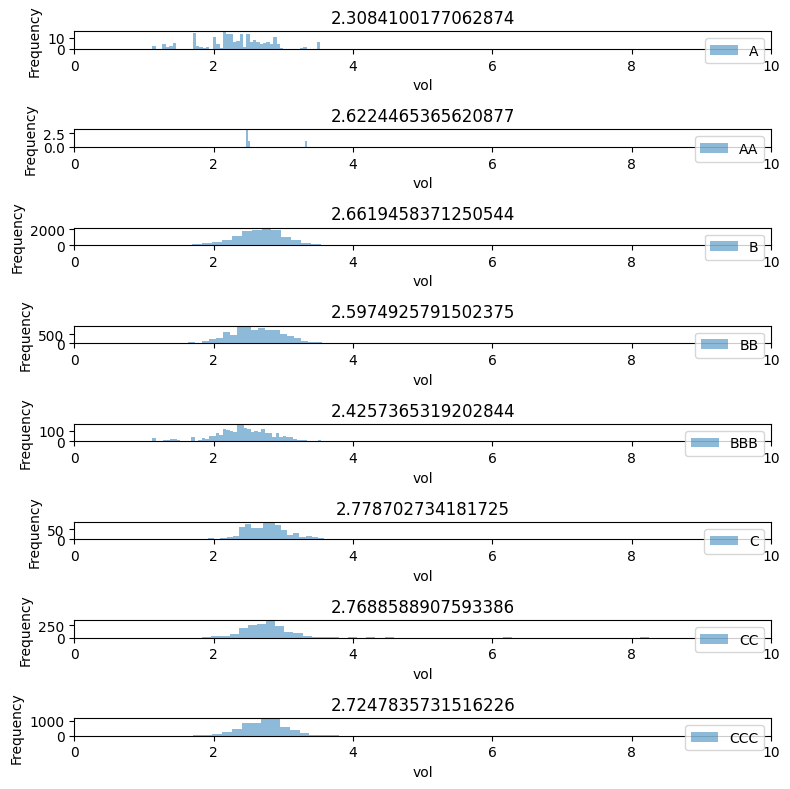

In [48]:
grouped = ESG.groupby('综合评级')

# 确定子图的数量
num_groups = len(grouped)

# 创建子图
fig, axes = plt.subplots(num_groups, 1, figsize=(8, 1 * num_groups))

# 绘制每个评级的vol直方图
for ax, (name, group) in zip(axes, grouped):
    ax.hist(group['vol'], bins=50, alpha=0.5, label=name)
    ax.set_xlabel('vol')
    ax.set_ylabel('Frequency')
    ax.set_title(group['vol'].mean())#f'Histogram of vol for {name}')
    ax.set_xlim(0, 10)
    ax.legend()

plt.tight_layout()
plt.show()